In [1]:
# General
import pandas as pd
import numpy as np
from collections import Counter

# visualisation
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS

# NPL
from textblob import TextBlob
import nltk
from nltk.util import ngrams
from nltk.corpus import stopwords 
from nltk.tokenize import WhitespaceTokenizer
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import TfidfTransformer

In [2]:
# Reading the data
df = pd.read_csv('Womens Clothing E-Commerce Reviews.csv')
df.head()

,Unnamed: 0,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
0,0,767,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates
1,1,1080,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses
2,2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses
3,3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants
4,4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses


In [3]:
# Inspecting the variables
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23486 entries, 0 to 23485
Data columns (total 11 columns):
Unnamed: 0                 23486 non-null int64
Clothing ID                23486 non-null int64
Age                        23486 non-null int64
Title                      19676 non-null object
Review Text                22641 non-null object
Rating                     23486 non-null int64
Recommended IND            23486 non-null int64
Positive Feedback Count    23486 non-null int64
Division Name              23472 non-null object
Department Name            23472 non-null object
Class Name                 23472 non-null object
dtypes: int64(6), object(5)
memory usage: 2.0+ MB


In [4]:
# Drop the first column, which has the duplicate index information
df = df.drop(['Unnamed: 0'],axis=1)

In [5]:
# Drop the missing values from ‘Review Text’ columns 
df = df[df['Review Text'].notnull()]

In [63]:
# Create new variables
# review length
df['Character Count']= df['Review Text'].apply(len)

In [7]:
# polarity
df['Polarity score'] = df['Review Text'].apply(lambda x: TextBlob(x).sentiment.polarity)

In [8]:
# add sentiment columns
df['Sentiment']=''
df.loc[df['Polarity score']>0,'Sentiment']='Positive'
df.loc[df['Polarity score']==0,'Sentiment']='Neutral'
df.loc[df['Polarity score']<0,'Sentiment']='Negative'

In [9]:
# review text preprocessing
df['Tokenized Text'] = df['Review Text'].str.lower().str.strip()
df['Tokenized Text'] = df['Tokenized Text'].str.replace('\d+','')
df['Tokenized Text'] = df['Tokenized Text'].str.replace('[^\w\s]', '')

In [10]:
# tokenized review text
tokenizer = WhitespaceTokenizer()
lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))
def lemmatize_text(text):
      return [lemmatizer.lemmatize(w) for w in tokenizer.tokenize(text)]
def remove_stopwords(text):
    return[w for w in text if not w in stop_words]
df['Tokenized Text'] = df['Tokenized Text'].astype(str).apply(lemmatize_text)
df['Tokenized Text'] = df['Tokenized Text'].apply(remove_stopwords)
df['Tokenized Text'] = df['Tokenized Text'].apply(lambda x: ' '.join(x))

In [64]:
df.head()

,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name,Review Length,Polarity score,Sentiment,Tokenized Text,character count,Character Count
0,767,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates,53,0.633333,Positive,absolutely wonderful silky sexy comfortable,53,53
1,1080,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses,303,0.339583,Positive,love dress sooo pretty happened find store im ...,303,303
2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses,500,0.073675,Positive,high hope dress really wanted work initially o...,500,500
3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants,124,0.550000,Positive,love love love jumpsuit fun flirty fabulous ev...,124,124
4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses,192,0.512891,Positive,shirt flattering due adjustable front tie perf...,192,192


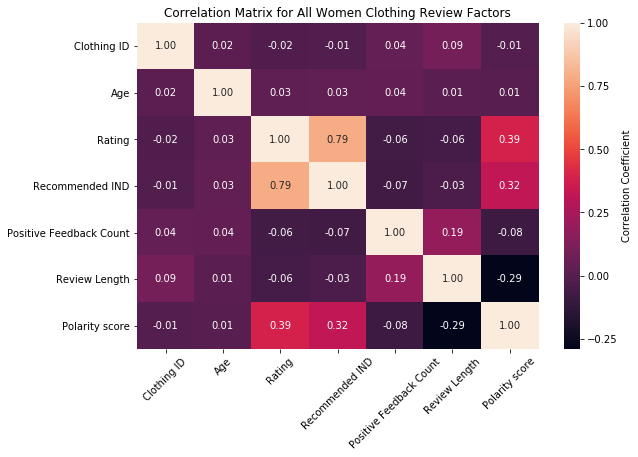

In [12]:
#Correlation Matrix for All Women Clothing Review Factors
plt.figure(figsize=[9,6])
_ = sns.heatmap(df.corr(), annot=True, fmt=".2f",cbar_kws={'label': 'Correlation Coefficient'})
plt.title("Correlation Matrix for All Women Clothing Review Factors")
plt.xticks(rotation=45)
plt.show()

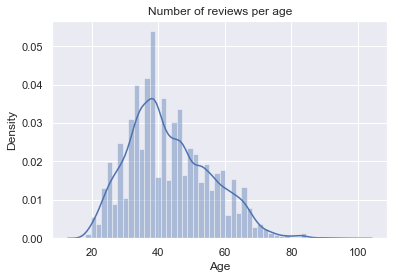

In [13]:
# overall age distribution
sns.set()
sns.distplot(df.Age)
plt.xlabel('Age')
plt.ylabel('Density')
plt.title('Number of reviews per age')
plt.show()

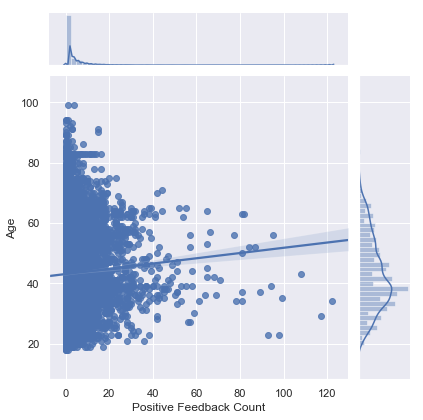

In [14]:
# the relationship between Positive Feedback vs Age
sns.jointplot(df['Positive Feedback Count'],df.Age,kind='reg')
plt.show()

In [15]:
# the total number of clothing ID 
print('the total number of Clothing ID in this dataset is: '+str(len(df['Clothing ID'].value_counts())))

the total number of Clothing ID in this dataset is: 1179


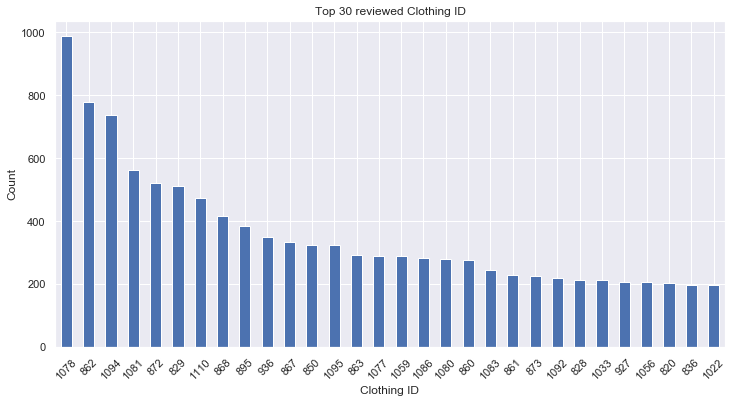

In [16]:
# the top 30 clothing ID
plt.figure(figsize=(12, 6))
df['Clothing ID'].value_counts()[:30].plot(kind='bar')
plt.xticks(rotation=45)
plt.xlabel('Clothing ID')
plt.ylabel('Count')
plt.title('Top 30 reviewed Clothing ID')
plt.show()

In [17]:
# find what is the most popular reivewing items
df1=df[df['Clothing ID'].isin([1078,863,1094])]['Class Name'].unique()
print('the most popular riewing items are : '+ str(df1))

the most popular riewing items are : ['Dresses' 'Knits']


In [18]:
# overal infro of the top reivewing items
df[df['Clothing ID'].isin([1078, 862,1094])].describe().drop('count',axis=0).drop('Clothing ID',axis =1)

,Age,Rating,Recommended IND,Positive Feedback Count,Review Length,Polarity score
mean,42.724800,4.189200,0.818400,2.862400,310.860400,0.256109
std,12.150429,1.104306,0.385592,6.773021,144.836158,0.178384
min,18.000000,1.000000,0.000000,0.000000,16.000000,-0.500000
25%,34.000000,4.000000,1.000000,0.000000,189.000000,0.149074
50%,41.000000,5.000000,1.000000,1.000000,305.000000,0.247036
75%,51.000000,5.000000,1.000000,3.000000,469.000000,0.357143
max,99.000000,5.000000,1.000000,98.000000,504.000000,1.000000


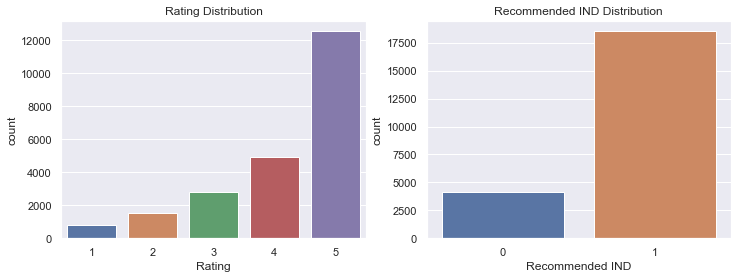

In [19]:
# overall Rating and Recommended IND distribution
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
sns.countplot(df.Rating)
plt.title('Rating Distribution')
plt.subplot(1,2,2)
sns.countplot(df['Recommended IND'])
plt.title('Recommended IND Distribution')
plt.show()

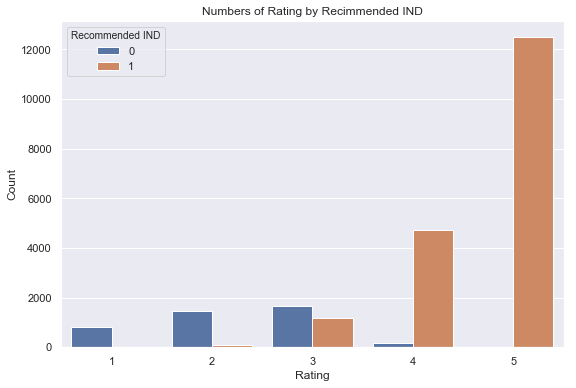

In [106]:
# Numbers of Rating by Recimmended IND
plt.figure(figsize=[9,6])
sns.countplot(x="Rating", hue="Recommended IND",data=df)
plt.title('Numbers of Rating by Recimmended IND')
plt.ylabel("Count")
plt.show()

In [21]:
# The Not recommend Portion
dislike = df['Recommended IND'].value_counts()[0]/(df['Recommended IND'].value_counts()[0]+df['Recommended IND'].value_counts()[1])
print('The Not recommend Portion in this datset is : '+str(dislike))

The Not recommend Portion in this datset is : 0.18113157546044786


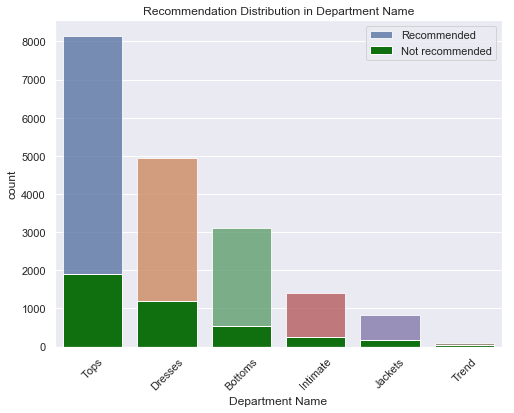

In [105]:
plt.figure(figsize = ((8,6)))
recommended = df[df['Recommended IND'] ==1]
not_recommended = df[df['Recommended IND']==0]
sns.countplot(recommended['Department Name'], order=df["Department Name"].value_counts().index,alpha=0.8, label = 'Recommended')
sns.countplot(not_recommended['Department Name'],order = df["Department Name"].value_counts().index,color= 'green',label='Not recommended')
plt.xticks(rotation=45)
plt.legend(loc= 'upper right')
plt.title('Recommendation Distribution in Department Name')
plt.show()

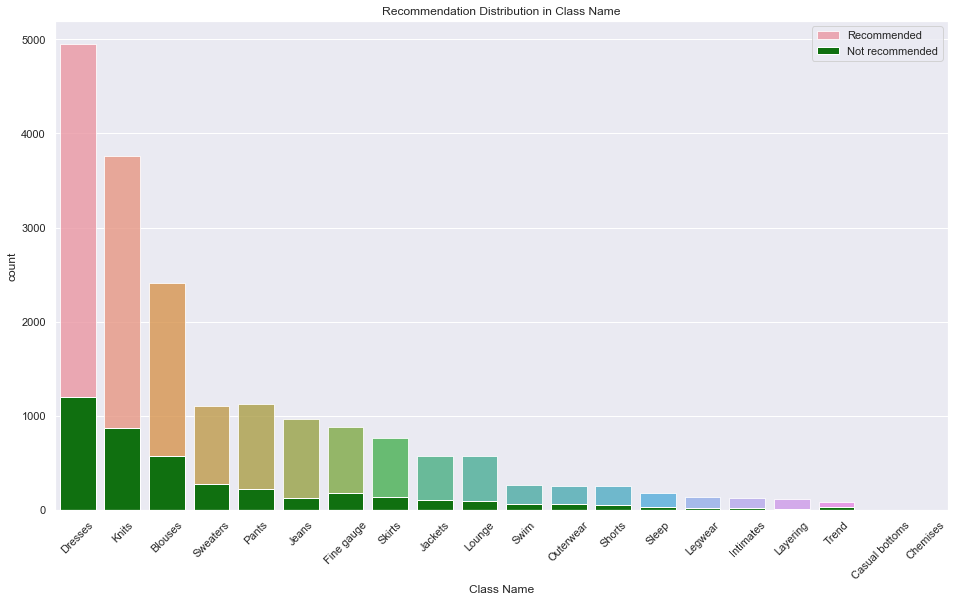

In [104]:
plt.figure(figsize = ((16,9)))
sns.countplot(recommended['Class Name'], order=df["Class Name"].value_counts().index,alpha=0.8, label = 'Recommended')
sns.countplot(not_recommended['Class Name'],order = df["Class Name"].value_counts().index,color= 'green',label='Not recommended')
plt.xticks(rotation=45)
plt.legend(loc= 'upper right')
plt.title('Recommendation Distribution in Class Name')
plt.show()

In [69]:
# reviw length in rating
rating = df.groupby(['Rating'])['Character Count'].count()
rating

Rating
1      821
2     1549
3     2823
4     4908
5    12540
Name: Character Count, dtype: int64

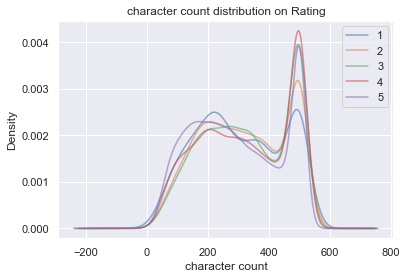

In [68]:
# review length distribution on Rating
df.groupby('Rating')['Character Count'].plot(kind = 'density',alpha=0.6)
plt.legend()
plt.xlabel('character count')
plt.title('character count distribution on Rating')
plt.show()

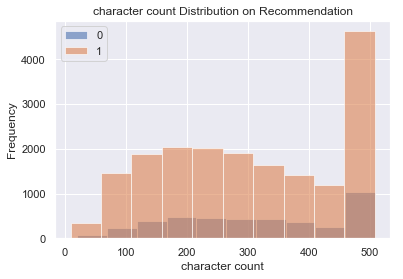

In [67]:
# review length distribution on Recommendation
df.groupby('Recommended IND')['Character Count'].plot(kind = 'hist',alpha = 0.6)
plt.legend()
plt.xlabel('character count')
plt.title('character count Distribution on Recommendation')
plt.show()

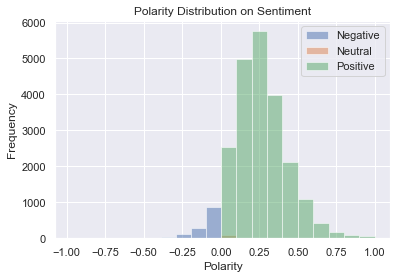

In [27]:
# sentiment analysis
df.groupby('Sentiment')['Polarity score'].plot(kind = 'hist',alpha=0.5)
plt.legend()
plt.title('Polarity Distribution on Sentiment')
plt.xlabel('Polarity')
plt.show()

In [31]:
# initialize the vectorizer
count = CountVectorizer(stop_words='english', min_df=.0025, max_df=.9, ngram_range=(1,2))
count.fit(df['Tokenized Text'])
len(count.vocabulary_)

1797

In [56]:
#transform the document into a bag of words
bag_of_words = count.transform(df['Tokenized Text'])

In [101]:
# check the top 25 most common terms
occ = np.asarray(bag_of_words.sum(axis=0)).ravel().tolist()
counts_df = pd.DataFrame({'term': count.get_feature_names(), 'occurrences': occ})
count_top_25 = counts_df.sort_values(by='occurrences', ascending=False).head(25)

<Figure size 864x432 with 0 Axes>

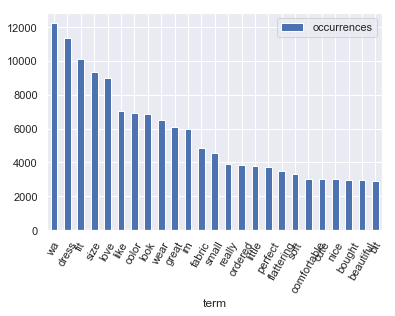

In [124]:
plt.figure(figsize=(12, 6))
count_top_25.plot(kind='bar',x='term',y='occurrences')
plt.xticks(rotation=60)
plt.show()

In [55]:
# use the TfidfTransformer to calculate the weights for each term
transformer = TfidfTransformer()
transformed_weights = transformer.fit_transform(bag_of_words)

In [110]:
# check the top 30 most common terms by average ti-idf weight
weights = np.asarray(transformed_weights.mean(axis=0)).ravel().tolist()
weights_df = pd.DataFrame({'term': count.get_feature_names(), 'weight': weights})
weight_top_20= weights_df.sort_values(by='weight', ascending=False).head(20)

<Figure size 864x432 with 0 Axes>

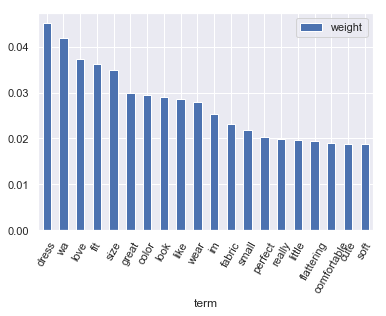

In [123]:
plt.figure(figsize=(12, 6))
weight_top_20.plot(kind= 'bar', x='term',y='weight')
plt.xticks(rotation=60)
plt.show()

In [36]:
# set X,y value
X = bag_of_words.tocsc()
y = df['Recommended IND']

In [38]:
# Naive Bayes
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
X_train,X_test,y_train,y_test = train_test_split(X, y,test_size = 0.2, random_state=42)
classifier = MultinomialNB()
classifier.fit(X_train, y_train)
training_accuracy = classifier.score(X_train,y_train)
test_accuracy = classifier.score(X_test,y_test)
print('the accuracy scores on trainning set: '+ str(training_accuracy))
print('the accuracy scores on test set: '+ str(test_accuracy))

the accuracy scores on trainning set: 0.8780366607773852
the accuracy scores on test set: 0.8699492161625083


In [75]:
# confusion_matrix
from sklearn.metrics import confusion_matrix
import scikitplot as skplt

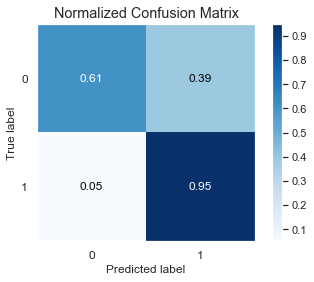

In [82]:
skplt.metrics.plot_confusion_matrix(classifier.predict(X_test), y_test, normalize=True)
plt.show()

In [77]:
# classification report
from sklearn.metrics import classification_report
print(classification_report(classifier.predict(X_test), y_test))

              precision    recall  f1-score   support

           0       0.77      0.61      0.68      1023
           1       0.89      0.95      0.92      3506

   micro avg       0.87      0.87      0.87      4529
   macro avg       0.83      0.78      0.80      4529
weighted avg       0.86      0.87      0.86      4529



In [54]:
# strongly predict features
terms = np.array(count.get_feature_names())

x = np.eye(X_test.shape[1])
probs = classifier.predict_log_proba(x)[:, 0]
ind = np.argsort(probs)

good_words = terms[ind[:20]]
bad_words = terms[ind[-20:]]

good_prob = probs[ind[:20]]
bad_prob = probs[ind[-20:]]

print("Good words\t     P(Recommended | word)")
for w, p in zip(good_words, good_prob):
    print("{:>20}".format(w), "{:.2f}".format(1 - np.exp(p)))

Good words	     P(Recommended | word)
    highly recommend 0.99
             dressed 0.99
          pleasantly 0.99
     compliment time 0.99
           plan wear 0.99
pleasantly surprised 0.99
           currently 0.99
       wa pleasantly 0.99
        denim jacket 0.98
             jewelry 0.98
      easily dressed 0.98
          compliment 0.98
          great jean 0.98
           great buy 0.98
        size perfect 0.98
        great skinny 0.98
           wait wear 0.98
            casually 0.98
   comfortable dress 0.98
      happy purchase 0.98


In [53]:
print("Bad words\t     P(Not Recommended | word)")
for w, p in zip(bad_words, bad_prob):
    print("{:>20}".format(w), "{:.2f}".format(1 - np.exp(p)))

Bad words	     P(Not Recommended | word)
          didnt work 0.37
         looked like 0.37
       disappointing 0.37
           shapeless 0.36
          wa excited 0.36
        disappointed 0.34
          look cheap 0.34
     wa disappointed 0.32
             wa huge 0.32
        unflattering 0.31
               cheap 0.31
      disappointment 0.31
       really wanted 0.29
               shame 0.24
            terrible 0.24
         wanted love 0.24
                poor 0.23
         wanted like 0.20
           high hope 0.17
               awful 0.17
